## EDA

### Let's Import the necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('e-finance dataset.csv')
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"Wood S.D., Trenter S.W., Brown S.W.",7401448337;6507120033;7501416829;,A strategic marketing approach to reduce healt...,1988,Medical Group Management,35,2,NaN,14+16,18.0,...,NaN,MGRMA,10302219.0,English,MED. GROUP MANAGE.,Article,Final,NaN,Scopus,2-s2.0-0023860119
224,"Heilman M.E., Martell R.F.",7003634564;7005947273;,Exposure to successful women: Antidote to sex ...,1986,Organizational Behavior and Human Decision Pro...,37,3,NaN,376,390.0,...,NaN,OBDPF,NaN,English,Organ. Behav. Hum. Decis. Processes,Article,Final,NaN,Scopus,2-s2.0-0000296359
225,Leech D.H.,7006363405;,PROFS IN THE SERC ENVIRONMENT.,1984,NaN,NaN,NaN,NaN,155,158.0,...,NaN,NaN,NaN,English,NaN,Conference Paper,Final,NaN,Scopus,2-s2.0-0021630846
226,Kanngiesser J.,6508380805;,Cost Analysis and Performance Calculation Asso...,1981,"Angewandte Informatik, Applied Informatics",23,11,NaN,467,474.0,...,NaN,AWIFA,NaN,German,Angew Inf Appl Inf,Article,Final,NaN,Scopus,2-s2.0-0019633841


In [3]:
df.shape

(228, 46)

In [4]:
df.describe()

,Year,Page end,Page count,Cited by,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Conference code,PubMed ID
count,228.000000,199.000000,4.000000,153.000000,0.0,0.0,0.0,0.0,62.000000,4.000000e+00
mean,2010.214912,723.462312,69.750000,9.294118,NaN,NaN,NaN,NaN,99295.548387,2.013451e+07
std,6.172437,5156.031031,115.508658,14.032801,NaN,NaN,NaN,NaN,33891.037731,9.310620e+06
min,1981.000000,3.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,6372.000000,1.030222e+07
25%,2007.000000,100.500000,12.250000,2.000000,NaN,NaN,NaN,NaN,84516.750000,1.424886e+07
50%,2011.000000,206.000000,13.000000,4.000000,NaN,NaN,NaN,NaN,92701.500000,1.924810e+07
75%,2014.000000,416.000000,70.500000,10.000000,NaN,NaN,NaN,NaN,109673.250000,2.513375e+07
max,2019.000000,72560.000000,243.000000,86.000000,NaN,NaN,NaN,NaN,227949.000000,3.173961e+07


#### From the count row, we can see that the toal number of observation is 228, and the year range is from 1981 to 2019.

In [5]:
#The Percentage of missing values in the dataset

df.isnull().sum()/df.shape[0]*100

Authors                            0.000000
Author(s) ID                       0.000000
Title                              0.000000
Year                               0.000000
Source title                       0.438596
Volume                            21.052632
Issue                             35.526316
Art. No.                          88.157895
Page start                         9.649123
Page end                          12.719298
Page count                        98.245614
Cited by                          32.894737
DOI                               23.684211
Link                               0.000000
Affiliations                       6.140351
Authors with affiliations          0.877193
Abstract                           0.000000
Author Keywords                   21.052632
Index Keywords                    55.701754
Molecular Sequence Numbers       100.000000
Chemicals/CAS                    100.000000
Tradenames                       100.000000
Manufacturers                   

#### We will have to drop the columns with null values above 60%.  

In [6]:
df= df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [7]:
#Check the dataset again

df.isnull().sum()

Authors                           0
Author(s) ID                      0
Title                             0
Year                              0
Source title                      1
Volume                           48
Issue                            81
Page start                       22
Page end                         29
Cited by                         75
DOI                              54
Link                              0
Affiliations                     14
Authors with affiliations         2
Abstract                          0
Author Keywords                  48
References                       16
Correspondence Address           37
Publisher                        88
ISSN                             54
Language of Original Document     0
Abbreviated Source Title         10
Document Type                     0
Publication Stage                 0
Source                            0
EID                               0
dtype: int64

#### From the above count values, we have dropped Columns with empty entries above 60%

In [8]:
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,...,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,...,"Garay, J., Kiayias, A., Leonardos, N., The bit...","Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,...,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...","Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,"Sassi, S., Goaied, M., Financial development, ...","Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"Wood S.D., Trenter S.W., Brown S.W.",7401448337;6507120033;7501416829;,A strategic marketing approach to reduce healt...,1988,Medical Group Management,35,2,14+16,18.0,1.0,...,NaN,NaN,NaN,00257257,English,MED. GROUP MANAGE.,Article,Final,Scopus,2-s2.0-0023860119
224,"Heilman M.E., Martell R.F.",7003634564;7005947273;,Exposure to successful women: Antidote to sex ...,1986,Organizational Behavior and Human Decision Pro...,37,3,376,390.0,56.0,...,"Allport, (1954) The nature of prejudice, , Add...","Heilman, M.E.; New York UniversityUnited States",NaN,07495978,English,Organ. Behav. Hum. Decis. Processes,Article,Final,Scopus,2-s2.0-0000296359
225,Leech D.H.,7006363405;,PROFS IN THE SERC ENVIRONMENT.,1984,NaN,NaN,NaN,155,158.0,NaN,...,NaN,"Leech, D.H.; Science & Engineering Research, C...",NaN,NaN,English,NaN,Conference Paper,Final,Scopus,2-s2.0-0021630846
226,Kanngiesser J.,6508380805;,Cost Analysis and Performance Calculation Asso...,1981,"Angewandte Informatik, Applied Informatics",23,11,467,474.0,NaN,...,NaN,"Kanngiesser, J.",NaN,NaN,German,Angew Inf Appl Inf,Article,Final,Scopus,2-s2.0-0019633841


In [9]:
df['Language of Original Document'].unique()

array(['English', 'Polish', 'Chinese', 'German'], dtype=object)

In [10]:
language_count=df['Language of Original Document'].value_counts()
language_count

English    223
German       2
Chinese      2
Polish       1
Name: Language of Original Document, dtype: int64

#### From the above array, we can see that the Journals are from four languages. English, Polish, Chinese, German. The most is English.

In [11]:
years= df['Year'].unique()
years

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1988, 1986, 1984,
       1981], dtype=int64)

In [12]:
year_count=df['Year'].value_counts()
year_count

2011    35
2012    19
2010    19
2019    15
2006    15
2013    13
2007    13
2017    11
2015    11
2005    10
2018     9
2008     9
2014     9
2002     8
2016     7
2004     7
2001     5
2009     4
2003     4
1981     2
1988     1
1986     1
1984     1
Name: Year, dtype: int64

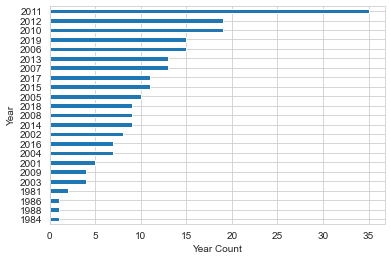

In [13]:
sns.set_style('whitegrid')
year_count = year_count.sort_values()
year_count.plot.barh()
plt.xticks()
plt.ylabel('Year')
plt.xlabel('Year Count')
plt.show()

#### From the above plot, we can see the most journals are dated 2011 from the dataset.

In [14]:
df['Author(s) ID'] = df['Author(s) ID'].str.rstrip(';')

C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_authors = df[['Authors', 'Title', 'Year']]
df_authors.head()

,Authors,Title,Year
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",Datablinder: A distributed data protection mid...,2019
1,"Xiong H., Zhou Y.",Construction and Application of Ocean Shipping...,2019
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",System architecture for high-performance permi...,2019
3,"Rožkalne Z., Mukāns M., Vētra A.",Transition-age young adults with cerebral pals...,2019
4,"Alshubiri F., Jamil S.A., Elheddad M.",The impact of ICT on financial development: Em...,2019


In [16]:
df_authors = df_authors.assign(Authors=df_authors['Authors'].str.split(',')).explode('Authors').reset_index(drop=True)
df_authors.drop(132, inplace=True)
df_authors.reset_index(drop=True, inplace=True)
df_authors.head(10)

,Authors,Title,Year
0,Beni E.H.,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,Datablinder: A distributed data protection mid...,2019
3,Aly A.,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,Construction and Application of Ocean Shipping...,2019
7,Feng L.,System architecture for high-performance permi...,2019
8,Zhang H.,System architecture for high-performance permi...,2019
9,Tsai W.-T.,System architecture for high-performance permi...,2019


#### The row with modified-index 132 was dropped because the name was mistakingly added to the dataset and didn't belong to anybody.
#### Also, a quick Google search revealed that no such author 'Jr.' was among the writers of the journal 'The Phenomenological Experience of First Responder Spouses', published in January 2016.

In [17]:
df_author_ids = df[['Author(s) ID', 'Title', 'Year']]
df_author_ids.head()

,Author(s) ID,Title,Year
0,57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019
1,57212174318;57212168803,Construction and Application of Ocean Shipping...,2019
2,57194783804;56979549200;57050382000;57197771738,System architecture for high-performance permi...,2019
3,57211844555;56074676500;6506045608,Transition-age young adults with cerebral pals...,2019
4,56539905200;56770916900;57195032630,The impact of ICT on financial development: Em...,2019


In [18]:
df_author_ids = df_author_ids.assign(**{'Author(s) ID': df_author_ids['Author(s) ID'].str.split(';')}).explode('Author(s) ID').reset_index(drop=True)
df_author_ids.head(10)

,Author(s) ID,Title,Year
0,57189258279,Datablinder: A distributed data protection mid...,2019
1,8933999000,Datablinder: A distributed data protection mid...,2019
2,22834655700,Datablinder: A distributed data protection mid...,2019
3,55841871100,Datablinder: A distributed data protection mid...,2019
4,55387606200,Datablinder: A distributed data protection mid...,2019
5,57212174318,Construction and Application of Ocean Shipping...,2019
6,57212168803,Construction and Application of Ocean Shipping...,2019
7,57194783804,System architecture for high-performance permi...,2019
8,56979549200,System architecture for high-performance permi...,2019
9,57050382000,System architecture for high-performance permi...,2019


In [19]:
authors_and_id = pd.concat([df_authors.Authors, df_author_ids], axis=1)
authors_and_id.head(10)

,Authors,Author(s) ID,Title,Year
0,Beni E.H.,57189258279,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,8933999000,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,22834655700,Datablinder: A distributed data protection mid...,2019
3,Aly A.,55841871100,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,55387606200,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,57212174318,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,57212168803,Construction and Application of Ocean Shipping...,2019
7,Feng L.,57194783804,System architecture for high-performance permi...,2019
8,Zhang H.,56979549200,System architecture for high-performance permi...,2019
9,Tsai W.-T.,57050382000,System architecture for high-performance permi...,2019


In [20]:
author_count = authors_and_id.Authors.value_counts()
author_count

Martin P.L.        6
Hu J.              5
 Zhong N.          5
Sakkthivel A.M.    4
 Rabhi F.          3
                  ..
 Kolluri S.        1
 McNevin V.        1
 Yoon M.-S.        1
Dandapani K.       1
Miyahara R.        1
Name: Authors, Length: 510, dtype: int64

#### We see that the person with the most publications is Martin P.L with 6 publications, closely followed by Hu J. and Zhong N.; each with 5 apiece.